# LSTM

Notebook to look at forecasts made using LSTM.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

In [2]:
from LSTM import backtest

In [3]:
ds_begin = datetime(2021, 7, 1)
ds_end = datetime(2023, 5, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

## Predictions when removing the seasonality

In [4]:
error = pd.read_csv('LSTM/errors_sa.csv')
print(error)

    Unnamed: 0  hidden_units  num_layers  sequence_lengths       MSE  \
0            0            10           1                12  0.000030   
1            0            10           1                18  0.000032   
2            0            10           1                24  0.000030   
3            0            10           2                12  0.000031   
4            0            10           2                18  0.000035   
5            0            10           2                24  0.000031   
6            0            10           3                12  0.000036   
7            0            10           3                18  0.000029   
8            0            10           3                24  0.000032   
9            0            12           1                12  0.000028   
10           0            12           1                18  0.000033   
11           0            12           1                24  0.000033   
12           0            12           2                12  0.00

We get the best results for hidden_units = 14, num_layers = 1 and sequence_length = 24. Let us plot the predictions.

In [5]:
features = ['sales_raw',
            'inventory_raw',
            'new_listings_raw',
            'mean_days_to_pending_raw',
            'mean_sale_to_list_ratio_raw',
            'median_days_to_pending_raw',
            'median_sale_to_list_ratio_raw',
            'newly_pending_listings_raw',
            'pct_listings_price_cut_raw',
            'pct_sold_above_list_price_raw',
            'pct_sold_below_list_price_raw']

In [6]:
batch_size = 4
learning_rate = 5e-4
n_epochs = 100
(y, y_hat) = backtest(features, 14, 1, 24, \
    batch_size, learning_rate, n_epochs, ds_begin, ds_end, 36, True)

2021-07-01 00:00:00
2021-08-01 00:00:00
2021-09-01 00:00:00
2021-10-01 00:00:00
2021-11-01 00:00:00
2021-12-01 00:00:00
2022-01-01 00:00:00
2022-02-01 00:00:00
2022-03-01 00:00:00
2022-04-01 00:00:00
2022-05-01 00:00:00
2022-06-01 00:00:00
2022-07-01 00:00:00
2022-08-01 00:00:00
2022-09-01 00:00:00
2022-10-01 00:00:00
2022-11-01 00:00:00
2022-12-01 00:00:00
2023-01-01 00:00:00
2023-02-01 00:00:00
2023-03-01 00:00:00
2023-04-01 00:00:00
2023-05-01 00:00:00


In [7]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


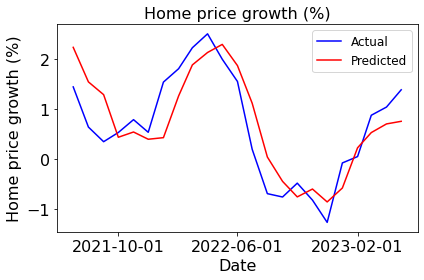

In [8]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2021, 10, 1), datetime(2022, 6, 1), datetime(2023, 2, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/LSTM.eps', format='eps')
plt.show()

## Predictions when keeping the seasonality

In [9]:
error = pd.read_csv('LSTM/errors_nsa.csv')
print(error)

    Unnamed: 0  hidden_units  num_layers  sequence_lengths       MSE  \
0            0            10           1                12  0.000038   
1            0            10           1                18  0.000042   
2            0            10           1                24  0.000040   
3            0            10           2                12  0.000043   
4            0            10           2                18  0.000041   
5            0            10           2                24  0.000037   
6            0            10           3                12  0.000037   
7            0            10           3                18  0.000036   
8            0            10           3                24  0.000039   
9            0            12           1                12  0.000038   
10           0            12           1                18  0.000037   
11           0            12           1                24  0.000044   
12           0            12           2                12  0.00

We get the best results for hidden_units = 14, num_layers = 2 and sequence_length = 24. Let us plot the predictions.

In [10]:
features = ['sales_raw',
            'inventory_raw',
            'new_listings_raw',
            'mean_days_to_pending_raw',
            'mean_sale_to_list_ratio_raw',
            'median_days_to_pending_raw',
            'median_sale_to_list_ratio_raw',
            'newly_pending_listings_raw',
            'pct_listings_price_cut_raw',
            'pct_sold_above_list_price_raw',
            'pct_sold_below_list_price_raw']

In [11]:
batch_size = 4
learning_rate = 5e-4
n_epochs = 100
(y, y_hat) = backtest(features, 14, 2, 24, \
    batch_size, learning_rate, n_epochs, ds_begin, ds_end, 36, False)

2021-07-01 00:00:00
2021-08-01 00:00:00
2021-09-01 00:00:00
2021-10-01 00:00:00
2021-11-01 00:00:00
2021-12-01 00:00:00
2022-01-01 00:00:00
2022-02-01 00:00:00
2022-03-01 00:00:00
2022-04-01 00:00:00
2022-05-01 00:00:00
2022-06-01 00:00:00
2022-07-01 00:00:00
2022-08-01 00:00:00
2022-09-01 00:00:00
2022-10-01 00:00:00
2022-11-01 00:00:00
2022-12-01 00:00:00
2023-01-01 00:00:00
2023-02-01 00:00:00
2023-03-01 00:00:00
2023-04-01 00:00:00
2023-05-01 00:00:00


In [12]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

Text(0.5, 1.0, 'Non seasonally adjusted ensemble model')

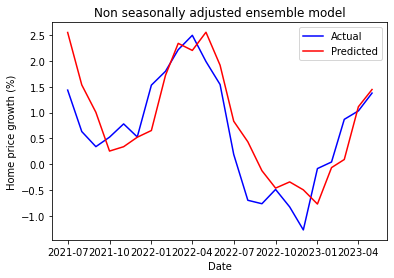

In [13]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted ensemble model')